In [17]:
import pyforest

In [18]:
df = pd.read_csv("/home/mete/udemy/08-Linear-Regression-Models/Advertising.csv")
df.head()

<IPython.core.display.Javascript object>

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [19]:
# splitting data into X(independent features) and y(dependent features)
X = df.drop("sales", axis=1)
y = df["sales"]

# checking linear regression

In [41]:
# splitting data into train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
# creating instance and training
from sklearn.linear_model import LinearRegression
modelSample = LinearRegression()
modelSample.fit(X_train, y_train)

LinearRegression()

In [22]:
# prediction
pre = modelSample.predict(X_test)

# performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
l_MAE = mean_absolute_error(y_test, pre)
l_RSME = np.sqrt(mean_squared_error(y_test, pre))
print("linear MAE: ", l_MAE)
print("linear RSME: ", l_RSME)

<IPython.core.display.Javascript object>

linear MAE:  1.4937750024728969
linear RSME:  1.93078438223472


# polinomial regression

In [24]:
all_errors_test = []
all_errors_train = []
# creating polinomial features
# with for loop we try to find out different degree and effect on train test data error
# we save different type of errors and degreets on all_errors list then we plot it to see degree-error relation
from sklearn.preprocessing import PolynomialFeatures
for i in range(1, 6):
    # creating polinomial X(independent) features
    pol_converter = PolynomialFeatures(degree=i, include_bias=False)
    pol_converted_X = pol_converter.fit_transform(X)

    #train_test data split
    X_train, X_test, y_train, y_test = train_test_split(pol_converted_X, y, test_size=0.33, random_state=42)
    
    # training and prediction
    from sklearn.linear_model import LinearRegression
    modelPol = LinearRegression()
    modelPol.fit(X_train, y_train)
    pre_test = modelPol.predict(X_test)
    pre_train = modelPol.predict(X_train)
    
    # performance
    from sklearn.metrics import mean_squared_error
    # for test data
    p_RSME_test = np.sqrt(mean_squared_error(y_test, pre_test))
    all_errors_test.append(p_RSME_test)
    
    # for train data
    p_RSME_train = np.sqrt(mean_squared_error(y_train, pre_train))
    all_errors_train.append(p_RSME_train)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

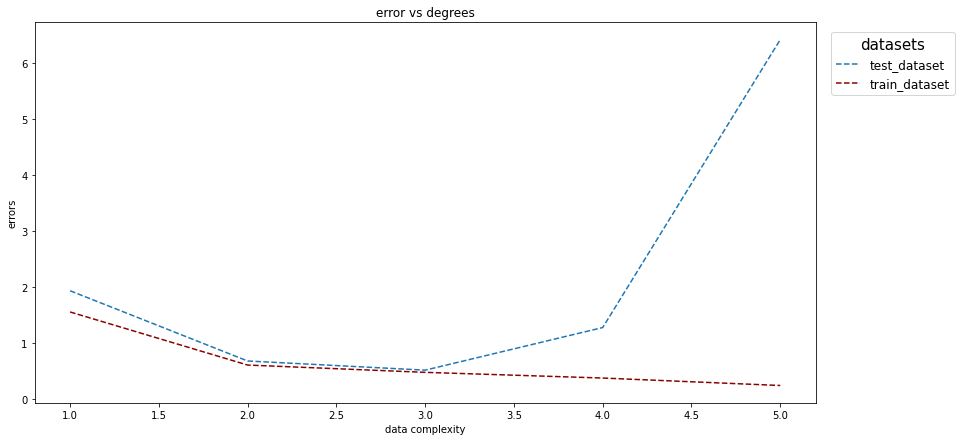

In [25]:
plt.figure(figsize=(14,7))
plt.plot(range(1,6), all_errors_test, "--")
plt.plot(range(1,6), all_errors_train, "--", c="darkred")
plt.title("error vs degrees")
plt.xlabel("data complexity")
plt.ylabel("errors")
plt.legend(labels=["test_dataset", "train_dataset"], loc=(1.02,0.81), title="datasets", 
           fontsize=12, title_fontsize=15);
# depends on this plot, we know we need to use degree as 3

In [34]:
# now we know degree 3 is optimal for use
# so we create final pol_converter and fully_converted_X depends this degree
final_converter = PolynomialFeatures(degree=3, include_bias=False)
final_converted_X = final_converter.fit_transform(X)

# spliting data depends on final_converted_X
X_train, X_test, y_train, y_test = train_test_split(final_converted_X, y, test_size=0.33, random_state=42)

# creating linear regression model depends on polinomailed X with degree 3
final_model = LinearRegression()

# training data and prediction
final_model.fit(X_train, y_train)
pre = final_model.predict(X_test)

## see result

# loading full converter
from joblib import dump, load
dump(final_model, "/home/mete/final_model.joblib") # saves model as persint file in computer, can be send etc
dump(final_converter, "/home/mete/final_converter.joblib")

['/home/mete/final_converter.joblib']

In [35]:
# loading a persisten ml.joblib file to system
loaded_model = load("/home/mete/final_model.joblib")
loaded_converter = load("/home/mete/final_converter.joblib")

In [36]:
# real world data / feautrues
campaign = [[149,22,12]]

# converting real world featurees into polinomialed version
con_X = loaded_converter.fit_transform(campaign)

# using model on converted data
loaded_model.predict(con_X)

array([14.57774927])